**Pricing database notebook. Run this to update the pricing database and generate monthly uploads for SalesForce.**

To run the commands, you can either click the play button on the left of each cell or select the cell and press Ctrl-Enter.

Install dependencies that Google Colab doesn't have available by default. You may need to restart the runtime if it prompts you below. You won't need to run this again once it has restarted.

In [1]:
!pip install requests_html
!pip install urlpath
!pip install tqdm

     |████████████████████████████████| 83 kB 1.5 MB/s 
     |████████████████████████████████| 111 kB 29.7 MB/s 
     |████████████████████████████████| 138 kB 67.5 MB/s 
     |████████████████████████████████| 127 kB 57.7 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=8dd203ea4b4204d70ef510882acfa5a4d7249e8fb62a20deb79999888dcfe189
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=2957dd94692c3b549d8b5975c0866159831f41037a98980c43606498a28201dc
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
Successfully built fake-useragent parse
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not

We need to mount the Google Drive which has our data. Run the cell below and follow the prompts.

In [2]:
import sys
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


Change our directory to the pricing database.

In [3]:
sys.path.append('/content/gdrive/My Drive/Pricing')

The cell below checks for updates for the pricing database in the Google Drive folder.

In [4]:
import AEMP
from pathlib import Path

BASE_DIR = Path(r'/content/gdrive/My Drive/Pricing/Data')
DB = AEMP.PricingDB(BASE_DIR)

DB.run()

No new data found.


Run DB.save_latest_month() to generate the latest month of pricing data for upload to Salesforce.

In [5]:
DB.save_latest_month()

Saved to Google Drive: /content/gdrive/My Drive/Pricing/Data/Monthly Data/2022-03-01_AEMP data.csv


Run DB.save_specific_months(start_date='yyyy-mm', end_date='yyyy-mm') to generate a csv file with a range of specific months of pricing data for queries or for upload to Salesforce. 

Enter the start date and end date in the format specified **without** the day. The start and end dates are inclusive (e.g., start June 2006 and end August 2006 will include data for June, July, and August 2006).

In [ ]:
DB.save_specific_months(start_date='2022-02', end_date='2022-02')

Saved to Google Drive: /content/gdrive/My Drive/Pricing/Data/Monthly Data/2022-02_to_2022-02_AEMP data.csv


To load the DB to run your own analysis in a Colab notebook, you can load the DB by running DB.load_db().

In [6]:
import pandas as pd

df = DB.load_db()

Markdown text cell. **ABC** and *italic text*

[Links](https://www.google.com)

# Test 1
## Test 2
### Test 3



# Basics of Pandas dataframe querying

Let's look at the loaded data.

In [ ]:
df

There's a lot of data! Let's limit it to just the first 100 rows and trial Google's interactive data table tool.

*iloc* allows us to slice the data, based on the index row/column numbers. We can omit 0 (it infers we want everything from the 0th row (inclusive) up to the 100th row (exclusive)).

In Python, the first element is given the index number 0. So the second element has index of 1, the third has an index of 2, and so on.

In [14]:
df.iloc[:100]

,Item Code,Legal Instrument Drug,Legal Instrument Form,Legal Instrument MoA,Brand Name,Formulary,Program,Manufacturer Code,Responsible Person,Pack Quantity,...,ATC_Code,ATC1,ATC3,ATC4,ATC5,ATC1_label,ATC3_label,ATC4_label,ATC5_label,ATC_Code_label
0,7241D,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Accord,F2,IN,OC,Accord Healthcare Pty Ltd,10,...,L01XX27,L,L01,L01X,L01XX,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,ANTINEOPLASTIC AGENTS,OTHER ANTINEOPLASTIC AGENTS,Other antineoplastic agents,arsenic trioxide
1,10699D,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Accord,F2,IN,OC,Accord Healthcare Pty Ltd,10,...,L01XX27,L,L01,L01X,L01XX,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,ANTINEOPLASTIC AGENTS,OTHER ANTINEOPLASTIC AGENTS,Other antineoplastic agents,arsenic trioxide
2,4371C,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Accord,F2,IP,OC,Accord Healthcare Pty Ltd,10,...,L01XX27,L,L01,L01X,L01XX,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,ANTINEOPLASTIC AGENTS,OTHER ANTINEOPLASTIC AGENTS,Other antineoplastic agents,arsenic trioxide
3,10691Q,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Accord,F2,IP,OC,Accord Healthcare Pty Ltd,10,...,L01XX27,L,L01,L01X,L01XX,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,ANTINEOPLASTIC AGENTS,OTHER ANTINEOPLASTIC AGENTS,Other antineoplastic agents,arsenic trioxide
4,7241D,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Juno,F2,IN,JU,Juno Pharmaceuticals Pty Ltd,10,...,L01XX27,L,L01,L01X,L01XX,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,ANTINEOPLASTIC AGENTS,OTHER ANTINEOPLASTIC AGENTS,Other antineoplastic agents,arsenic trioxide
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11867N,Blinatumomab,Powder for I.V. infusion 38.5 micrograms,Injection,Blincyto,F1,IN,AN,Amgen Australia Pty Limited,1,...,L01XC19,L,L01,L01X,L01XC,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,ANTINEOPLASTIC AGENTS,OTHER ANTINEOPLASTIC AGENTS,Monoclonal antibodies,blinatumomab
96,11799B,Blinatumomab,Powder for I.V. infusion 38.5 micrograms,Injection,Blincyto,F1,IN,AN,Amgen Australia Pty Limited,1,...,L01XC19,L,L01,L01X,L01XC,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,ANTINEOPLASTIC AGENTS,OTHER ANTINEOPLASTIC AGENTS,Monoclonal antibodies,blinatumomab
97,11118E,Blinatumomab,Powder for I.V. infusion 38.5 micrograms,Injection,Blincyto,F1,IP,AN,Amgen Australia Pty Limited,1,...,L01XC19,L,L01,L01X,L01XC,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,ANTINEOPLASTIC AGENTS,OTHER ANTINEOPLASTIC AGENTS,Monoclonal antibodies,blinatumomab
98,11120G,Blinatumomab,Powder for I.V. infusion 38.5 micrograms,Injection,Blincyto,F1,IP,AN,Amgen Australia Pty Limited,1,...,L01XC19,L,L01,L01X,L01XC,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,ANTINEOPLASTIC AGENTS,OTHER ANTINEOPLASTIC AGENTS,Monoclonal antibodies,blinatumomab


We can slice columns as well as rows using iloc, and both, simultaneously.

Let's get the first 50 rows and the first 5 columns.

In [15]:
df.iloc[:50, :5]

,Item Code,Legal Instrument Drug,Legal Instrument Form,Legal Instrument MoA,Brand Name
0,7241D,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Accord
1,10699D,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Accord
2,4371C,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Accord
3,10691Q,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Accord
4,7241D,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Juno
5,10699D,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Juno
6,4371C,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Juno
7,10691Q,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Juno
8,7241D,Arsenic,Injection concentrate containing arsenic triox...,Injection,Phenasen
9,10699D,Arsenic,Injection concentrate containing arsenic triox...,Injection,Phenasen


How about the 75th to 100th row, and 5th to 9th column? (Remember the ending digit is exclusive rather than inclusive)

In [16]:
df.iloc[75:101, 5:10]

,Formulary,Program,Manufacturer Code,Responsible Person,Pack Quantity
75,F1,IP,RO,Roche Products Pty Ltd,1
76,F1,IP,RO,Roche Products Pty Ltd,1
77,F1,IP,RO,Roche Products Pty Ltd,1
78,F1,IP,RO,Roche Products Pty Ltd,1
79,F1,IP,RO,Roche Products Pty Ltd,1
80,F1,IP,RO,Roche Products Pty Ltd,1
81,F1,IP,RO,Roche Products Pty Ltd,1
82,F1,IP,RO,Roche Products Pty Ltd,1
83,F1,IP,RO,Roche Products Pty Ltd,1
84,F1,IP,RO,Roche Products Pty Ltd,1


Now let's try selecting the **last** 50 rows and the last 10 columns.

We can use a handy property of Python which allows slicing using negative numbers to get the last elements of an iterable object.

In [17]:
df.iloc[-50:, -10:]

,ATC_Code,ATC1,ATC3,ATC4,ATC5,ATC1_label,ATC3_label,ATC4_label,ATC5_label,ATC_Code_label
935328,J05AF01,J,J05,J05A,J05AF,ANTIINFECTIVES FOR SYSTEMIC USE,ANTIVIRALS FOR SYSTEMIC USE,DIRECT ACTING ANTIVIRALS,Nucleoside and nucleotide reverse transcriptas...,zidovudine
935329,C05AX04,C,C05,C05A,C05AX,CARDIOVASCULAR SYSTEM,VASOPROTECTIVES,AGENTS FOR TREATMENT OF HEMORRHOIDS AND ANAL F...,Other agents for treatment of hemorrhoids and ...,zinc preparations
935330,C05AX04,C,C05,C05A,C05AX,CARDIOVASCULAR SYSTEM,VASOPROTECTIVES,AGENTS FOR TREATMENT OF HEMORRHOIDS AND ANAL F...,Other agents for treatment of hemorrhoids and ...,zinc preparations
935331,D11AX,D,D11,D11A,D11AX,DERMATOLOGICALS,OTHER DERMATOLOGICAL PREPARATIONS,OTHER DERMATOLOGICAL PREPARATIONS,Other dermatologicals,Other dermatologicals
935332,N05AE04,N,N05,N05A,N05AE,NERVOUS SYSTEM,PSYCHOLEPTICS,ANTIPSYCHOTICS,Indole derivatives,ziprasidone
935333,N05AE04,N,N05,N05A,N05AE,NERVOUS SYSTEM,PSYCHOLEPTICS,ANTIPSYCHOTICS,Indole derivatives,ziprasidone
935334,N05AE04,N,N05,N05A,N05AE,NERVOUS SYSTEM,PSYCHOLEPTICS,ANTIPSYCHOTICS,Indole derivatives,ziprasidone
935335,N05AE04,N,N05,N05A,N05AE,NERVOUS SYSTEM,PSYCHOLEPTICS,ANTIPSYCHOTICS,Indole derivatives,ziprasidone
935336,N05AE04,N,N05,N05A,N05AE,NERVOUS SYSTEM,PSYCHOLEPTICS,ANTIPSYCHOTICS,Indole derivatives,ziprasidone
935337,N05AE04,N,N05,N05A,N05AE,NERVOUS SYSTEM,PSYCHOLEPTICS,ANTIPSYCHOTICS,Indole derivatives,ziprasidone


And if we want just the last row and column, we can use -1. Since we have specified a single row/column pair, this will return us the value at those co-ordinates.

In [18]:
df.iloc[-1, -1]

'zuclopenthixol'

To select by column names, we can use *loc*.

This allows slicing in a similar fashion as in iloc, but instead we use the names rather than their indexes.

Our row indexes are just numbers, so we can still select these using numerical indexes if we want. But for columns, we can use names!

Lets select the first 50 rows and all columns up to "Formulary".

In [19]:
df.loc[:50, :'Formulary']

,Item Code,Legal Instrument Drug,Legal Instrument Form,Legal Instrument MoA,Brand Name,Formulary
0,7241D,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Accord,F2
1,10699D,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Accord,F2
2,4371C,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Accord,F2
3,10691Q,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Accord,F2
4,7241D,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Juno,F2
5,10699D,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Juno,F2
6,4371C,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Juno,F2
7,10691Q,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Juno,F2
8,7241D,Arsenic,Injection concentrate containing arsenic triox...,Injection,Phenasen,F2
9,10699D,Arsenic,Injection concentrate containing arsenic triox...,Injection,Phenasen,F2


And if we wanted just the columns between Item Code and Formulary...

In [20]:
df.loc['Item Code':'Formulary']

,Item Code,Legal Instrument Drug,Legal Instrument Form,Legal Instrument MoA,Brand Name,Formulary,Program,Manufacturer Code,Responsible Person,Pack Quantity,...,ATC_Code,ATC1,ATC3,ATC4,ATC5,ATC1_label,ATC3_label,ATC4_label,ATC5_label,ATC_Code_label


That's weird! Why are we getting the columns but no row data?

Because Pandas needs us to specify that we do want the rows. If we want all rows, we can just leave an empty :. Pandas infers that this means we want ALL of the rows.

In [21]:
df.loc[:, 'Item Code':'Formulary']

,Item Code,Legal Instrument Drug,Legal Instrument Form,Legal Instrument MoA,Brand Name,Formulary
0,7241D,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Accord,F2
1,10699D,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Accord,F2
2,4371C,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Accord,F2
3,10691Q,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Accord,F2
4,7241D,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Juno,F2
...,...,...,...,...,...,...
935373,4522B,Zopiclone,Tablet 7.5 mg,Oral,Imovane,None
935374,4522B,Zopiclone,Tablet 7.5 mg,Oral,Imrest,None
935375,4522B,Zopiclone,Tablet 7.5 mg,Oral,Pharmacor Zopiclone,None
935376,4522B,Zopiclone,Tablet 7.5 mg,Oral,Zopiclone GH,None


So we have the basics. How about something more useful, like filtering to an item code we're interested in?

First, let's select just the column or field we're interested in.

In [22]:
df['Item Code']

0          7241D
1         10699D
2          4371C
3         10691Q
4          7241D
           ...  
935373     4522B
935374     4522B
935375     4522B
935376     4522B
935377     8097E
Name: Item Code, Length: 935378, dtype: object

Great - now lets find just the item code '7214D'

In [23]:
df.loc[df['Item Code'] == '7241D'] # == for equality

# x = 5 # <- sets x to 5
# x == 5 # checks whether x is equal to 5

,Item Code,Legal Instrument Drug,Legal Instrument Form,Legal Instrument MoA,Brand Name,Formulary,Program,Manufacturer Code,Responsible Person,Pack Quantity,...,ATC_Code,ATC1,ATC3,ATC4,ATC5,ATC1_label,ATC3_label,ATC4_label,ATC5_label,ATC_Code_label
0,7241D,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Accord,F2,IN,OC,Accord Healthcare Pty Ltd,10,...,L01XX27,L,L01,L01X,L01XX,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,ANTINEOPLASTIC AGENTS,OTHER ANTINEOPLASTIC AGENTS,Other antineoplastic agents,arsenic trioxide
4,7241D,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Juno,F2,IN,JU,Juno Pharmaceuticals Pty Ltd,10,...,L01XX27,L,L01,L01X,L01XX,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,ANTINEOPLASTIC AGENTS,OTHER ANTINEOPLASTIC AGENTS,Other antineoplastic agents,arsenic trioxide
8,7241D,Arsenic,Injection concentrate containing arsenic triox...,Injection,Phenasen,F2,IN,FF,Phebra Pty Ltd,10,...,L01XX27,L,L01,L01X,L01XX,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,ANTINEOPLASTIC AGENTS,OTHER ANTINEOPLASTIC AGENTS,Other antineoplastic agents,arsenic trioxide
10070,7241D,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Accord,F2,IN,OC,Accord Healthcare Pty Ltd,10,...,L01XX27,L,L01,L01X,L01XX,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,ANTINEOPLASTIC AGENTS,OTHER ANTINEOPLASTIC AGENTS,Other antineoplastic agents,arsenic trioxide
10074,7241D,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Juno,F2,IN,JU,Juno Pharmaceuticals Pty Ltd,10,...,L01XX27,L,L01,L01X,L01XX,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,ANTINEOPLASTIC AGENTS,OTHER ANTINEOPLASTIC AGENTS,Other antineoplastic agents,arsenic trioxide
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914279,7241D,Arsenic,Injection concentrate containing arsenic triox...,Injection,Phenasen,F2,IN,FF,Phebra Pty Ltd,10,...,L01XX27,L,L01,L01X,L01XX,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,ANTINEOPLASTIC AGENTS,OTHER ANTINEOPLASTIC AGENTS,Other antineoplastic agents,arsenic trioxide
924855,7241D,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Accord,F2,IN,OC,Accord Healthcare Pty. Ltd.,10,...,L01XX27,L,L01,L01X,L01XX,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,ANTINEOPLASTIC AGENTS,OTHER ANTINEOPLASTIC AGENTS,Other antineoplastic agents,arsenic trioxide
924859,7241D,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Juno,F2,IN,JU,Juno Pharmaceuticals Pty Ltd,10,...,L01XX27,L,L01,L01X,L01XX,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,ANTINEOPLASTIC AGENTS,OTHER ANTINEOPLASTIC AGENTS,Other antineoplastic agents,arsenic trioxide
924863,7241D,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide-AFT,F2,IN,AE,AFT Pharmaceuticals (AU) Pty Ltd,10,...,L01XX27,L,L01,L01X,L01XX,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,ANTINEOPLASTIC AGENTS,OTHER ANTINEOPLASTIC AGENTS,Other antineoplastic agents,arsenic trioxide


Under the hood, Pandas is looking for every row in df which satisfies the conditions we've included in our *loc*. Passing just the argument inside *loc* returns an array (in Pandas this is called a Series) which is the length of our 
dataframe filled with True/False values.

In [26]:
df['Item Code'] == '7241D'

0          True
1         False
2         False
3         False
4          True
          ...  
935373    False
935374    False
935375    False
935376    False
935377    False
Name: Item Code, Length: 935378, dtype: bool

Conditions can be combined using the **&** (AND) and **|** (OR) operators. 

When multiple conditions are specified, the conditions must be contained within brackets to work.  

In [27]:
df.loc[(df['Item Code'] == '7241D') & (df.Date == df.Date.max())]

,Item Code,Legal Instrument Drug,Legal Instrument Form,Legal Instrument MoA,Brand Name,Formulary,Program,Manufacturer Code,Responsible Person,Pack Quantity,...,ATC_Code,ATC1,ATC3,ATC4,ATC5,ATC1_label,ATC3_label,ATC4_label,ATC5_label,ATC_Code_label
914267,7241D,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Accord,F2,IN,OC,Accord Healthcare Pty. Ltd.,10,...,L01XX27,L,L01,L01X,L01XX,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,ANTINEOPLASTIC AGENTS,OTHER ANTINEOPLASTIC AGENTS,Other antineoplastic agents,arsenic trioxide
914271,7241D,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide Juno,F2,IN,JU,Juno Pharmaceuticals Pty Ltd,10,...,L01XX27,L,L01,L01X,L01XX,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,ANTINEOPLASTIC AGENTS,OTHER ANTINEOPLASTIC AGENTS,Other antineoplastic agents,arsenic trioxide
914275,7241D,Arsenic,Injection concentrate containing arsenic triox...,Injection,Arsenic Trioxide-AFT,F2,IN,AE,AFT Pharmaceuticals (AU) Pty Ltd,10,...,L01XX27,L,L01,L01X,L01XX,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,ANTINEOPLASTIC AGENTS,OTHER ANTINEOPLASTIC AGENTS,Other antineoplastic agents,arsenic trioxide
914279,7241D,Arsenic,Injection concentrate containing arsenic triox...,Injection,Phenasen,F2,IN,FF,Phebra Pty Ltd,10,...,L01XX27,L,L01,L01X,L01XX,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,ANTINEOPLASTIC AGENTS,OTHER ANTINEOPLASTIC AGENTS,Other antineoplastic agents,arsenic trioxide


As you can see there are different ways of querying columns within dataframes.

df.Date works just as well as df['Item Code'].

There are some quirks of Pandas which makes it 'safer' to use the df['Item Code'] form. Additionally, this is the only way of selecting columns with spaces in them.

We can do operations on columns - e.g. what is the sum of of all AEMPs?

In [28]:
df['AEMP'].sum()

359907045.45000005

sum() is a *method* which belongs to Pandas Series objects. There are many others - such as mean, min, max. Let's print all of these to the console. 

In [29]:
print(df['AEMP'].sum())
print(df['AEMP'].mean())
print(df['AEMP'].min())
print(df['AEMP'].max())

359907045.45000005
384.7717665478935
0.32
110000.0


Back to dataframes - you can list all the column names by calling df.columns

In [30]:
df.columns

Index(['Item Code', 'Legal Instrument Drug', 'Legal Instrument Form',
       'Legal Instrument MoA', 'Brand Name', 'Formulary', 'Program',
       'Manufacturer Code', 'Responsible Person', 'Pack Quantity',
       'Pricing Quantity', 'Vial Content', 'Maximum Quantity/Amount',
       'Maximum/Number Repeats', 'AEMP', 'PEMP', 'Ex-man Price per Vial',
       'DPMQ/DPMA', 'Claimed Price for Pack', 'Claimed Price for vial',
       'Claimed DPMQ/DPMA', 'Premium', 'Commonwealth Pays Premium',
       'Maximum Patient Charge', 'AMT TPP', 'Date', 'Schedule', 'Premium Type',
       'Price to Pharmacy', 'Claimed Price to Pharmacist', 'SKU ID',
       'Previous AEMP', 'AEMP_Increase', 'AEMP_Decrease', 'AEMP_Abs_Change',
       'AEMP_Rel_Change', 'ATC_Code', 'ATC1', 'ATC3', 'ATC4', 'ATC5',
       'ATC1_label', 'ATC3_label', 'ATC4_label', 'ATC5_label',
       'ATC_Code_label'],
      dtype='object')

# Use cases


## Find all item codes for a manufacturer and find when they were first listed

Note: Pricing data exists only back to August 2013.

In [ ]:
df.loc[
       (df['Responsible Person']=='Novartis Pharmaceuticals Australia Pty Limited') |
       (df['Responsible Person']=='Novartis Consumer Health Australasia Pty Ltd') &
       (df['Legal Instrument MoA']=='Injection')
       ]

In [ ]:
df['Legal Instrument MoA'].unique()

In [ ]:
df['Date'].dt.year

In [39]:
# Let's look for PBS items sponsored by Novartis

# Responsible Person = Sponsor/Manufacturer

df.loc[df['Responsible Person'].str.contains('Novartis')]['Responsible Person'].unique()

array(['Novartis Pharmaceuticals Australia Pty Limited',
       'Novartis Consumer Health Australasia Pty Ltd'], dtype=object)

Let's just look for pharmaceuticals rather than consumer goods.

In [40]:
man = 'Novartis Pharmaceuticals Australia Pty Limited'

# Store all Novartis items as a separate dataframe for querying.
nov = df.loc[df['Responsible Person']==man]

In [41]:
nov.head()

,Item Code,Legal Instrument Drug,Legal Instrument Form,Legal Instrument MoA,Brand Name,Formulary,Program,Manufacturer Code,Responsible Person,Pack Quantity,...,ATC_Code,ATC1,ATC3,ATC4,ATC5,ATC1_label,ATC3_label,ATC4_label,ATC5_label,ATC_Code_label
970,3016R,Amantadine,Capsule containing amantadine hydrochloride 10...,Oral,Symmetrel 100,F1,GE,NV,Novartis Pharmaceuticals Australia Pty Limited,100,...,N04BB01,N,N04,N04B,N04BB,NERVOUS SYSTEM,ANTI-PARKINSON DRUGS,DOPAMINERGIC AGENTS,Adamantane derivatives,amantadine
1194,9377M,Amlodipine with valsartan,Tablet 10 mg (as besilate)-160 mg,Oral,Exforge 10/160,F2,GE,NV,Novartis Pharmaceuticals Australia Pty Limited,28,...,C09DB01,C,C09,C09D,C09DB,CARDIOVASCULAR SYSTEM,AGENTS ACTING ON THE RENIN-ANGIOTENSIN SYSTEM,"ANGIOTENSIN II RECEPTOR BLOCKERS (ARBs), COMBI...",Angiotensin II receptor blockers (ARBs) and ca...,valsartan and amlodipine
1195,9377M,Amlodipine with valsartan,Tablet 10 mg (as besilate)-160 mg,Oral,Valsartan/Amlodipine Novartis 160/10,F2,GE,NM,Novartis Pharmaceuticals Australia Pty Limited,28,...,C09DB01,C,C09,C09D,C09DB,CARDIOVASCULAR SYSTEM,AGENTS ACTING ON THE RENIN-ANGIOTENSIN SYSTEM,"ANGIOTENSIN II RECEPTOR BLOCKERS (ARBs), COMBI...",Angiotensin II receptor blockers (ARBs) and ca...,valsartan and amlodipine
1196,5460J,Amlodipine with valsartan,Tablet 10 mg (as besilate)-320 mg,Oral,Exforge 10/320,F2,GE,NV,Novartis Pharmaceuticals Australia Pty Limited,28,...,C09DB01,C,C09,C09D,C09DB,CARDIOVASCULAR SYSTEM,AGENTS ACTING ON THE RENIN-ANGIOTENSIN SYSTEM,"ANGIOTENSIN II RECEPTOR BLOCKERS (ARBs), COMBI...",Angiotensin II receptor blockers (ARBs) and ca...,valsartan and amlodipine
1197,5460J,Amlodipine with valsartan,Tablet 10 mg (as besilate)-320 mg,Oral,Valsartan/Amlodipine Novartis 320/10,F2,GE,NM,Novartis Pharmaceuticals Australia Pty Limited,28,...,C09DB01,C,C09,C09D,C09DB,CARDIOVASCULAR SYSTEM,AGENTS ACTING ON THE RENIN-ANGIOTENSIN SYSTEM,"ANGIOTENSIN II RECEPTOR BLOCKERS (ARBs), COMBI...",Angiotensin II receptor blockers (ARBs) and ca...,valsartan and amlodipine


In [42]:
# groupby lets you aggregate items/rows together that share common values
# in the passed fields.
# You can select multiple fields by passing in a list of fields

res = nov.groupby(['Legal Instrument Drug', 'Item Code'])['Date'].min()

res

Legal Instrument Drug      Item Code
Amantadine                 3016R       2013-08-01
Amlodipine with valsartan  5459H       2013-08-01
                           5460J       2013-08-01
                           9375K       2013-08-01
                           9376L       2013-08-01
                                          ...    
Zoledronic acid            10554L      2015-12-01
                           6371H       2013-08-01
                           9288W       2013-08-01
                           9350D       2013-08-01
                           9653C       2013-08-01
Name: Date, Length: 547, dtype: datetime64[ns]

In [ ]:
# Graph the listing date of item codes in ascending order
# value_counts() is a super handy way to count the number of values in a series

res.value_counts().sort_index()

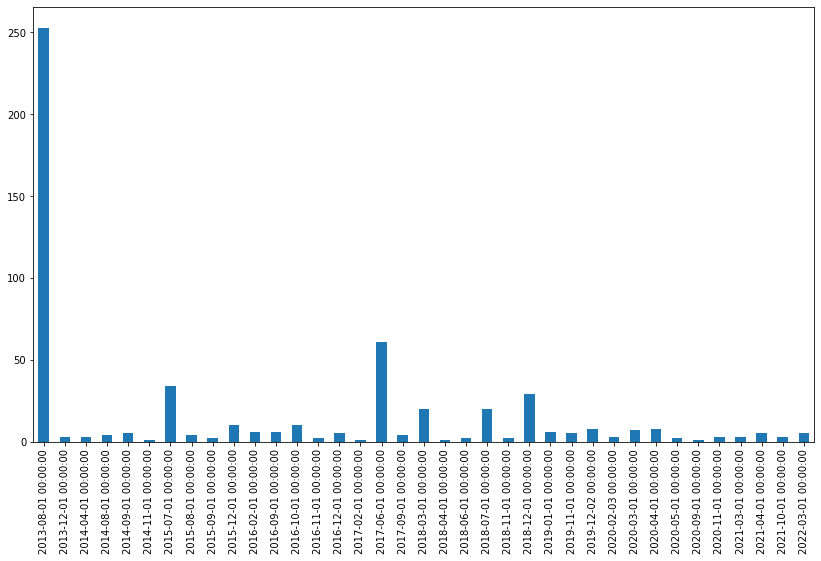

In [45]:
res.value_counts().sort_index().plot(kind='bar', figsize=(14,8))

In [48]:
BASE_DIR / 'Outputs' / 'test.csv'

PosixPath('/content/gdrive/My Drive/Pricing/Data/Outputs/test.csv')

In [49]:
SAVE_PATH = BASE_DIR / 'Outputs' / 'test.csv'
SAVE_PATH.parent.mkdir(exist_ok=True, parents=True)

res.to_csv(SAVE_PATH)

## Graph price erosion curves for a medicine with multiple item codes

In [11]:
bort = df.loc[df['Legal Instrument Drug']=='Bortezomib']

In [ ]:
bort.head()

,Item Code,Legal Instrument Drug,Legal Instrument Form,Legal Instrument MoA,Brand Name,Formulary,Program,Manufacturer Code,Responsible Person,Pack Quantity,...,ATC_Code,ATC1,ATC3,ATC4,ATC5,ATC1_label,ATC3_label,ATC4_label,ATC5_label,ATC_Code_label
102,7275X,Bortezomib,Powder for injection 1 mg,Injection,Velcade,F1,IN,JC,Janssen-Cilag Pty Ltd,1,...,L01XG01,L,L01,L01X,L01XG,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,ANTINEOPLASTIC AGENTS,OTHER ANTINEOPLASTIC AGENTS,Proteasome inhibitors,bortezomib
103,7275X,Bortezomib,Powder for injection 3 mg,Injection,Velcade,F1,IN,JC,Janssen-Cilag Pty Ltd,1,...,L01XG01,L,L01,L01X,L01XG,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,ANTINEOPLASTIC AGENTS,OTHER ANTINEOPLASTIC AGENTS,Proteasome inhibitors,bortezomib
104,7238Y,Bortezomib,Powder for injection 1 mg,Injection,Velcade,F1,IN,JC,Janssen-Cilag Pty Ltd,1,...,L01XG01,L,L01,L01X,L01XG,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,ANTINEOPLASTIC AGENTS,OTHER ANTINEOPLASTIC AGENTS,Proteasome inhibitors,bortezomib
105,7238Y,Bortezomib,Powder for injection 3 mg,Injection,Velcade,F1,IN,JC,Janssen-Cilag Pty Ltd,1,...,L01XG01,L,L01,L01X,L01XG,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,ANTINEOPLASTIC AGENTS,OTHER ANTINEOPLASTIC AGENTS,Proteasome inhibitors,bortezomib
106,7274W,Bortezomib,Powder for injection 1 mg,Injection,Velcade,F1,IN,JC,Janssen-Cilag Pty Ltd,1,...,L01XG01,L,L01,L01X,L01XG,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,ANTINEOPLASTIC AGENTS,OTHER ANTINEOPLASTIC AGENTS,Proteasome inhibitors,bortezomib


In [ ]:
# Assess whether there are multiple AEMPs associated with item codes in a given date

bort.groupby(['Date', 'Item Code'])['AEMP'].nunique().value_counts()

2    840
1    532
3     20
4     10
Name: AEMP, dtype: int64

In [ ]:
# There are multiple - so we need to drill down more specifically

bort.groupby(['Date', 'Legal Instrument Form', 'Item Code'])['AEMP'].nunique().value_counts()

1    2312
Name: AEMP, dtype: int64

In [ ]:
# Found that Item Code and Formulation are sufficient to narrow down our search.
# But we should check if Formulation alone is sufficient

bort.groupby(['Date', 'Legal Instrument Form'])['AEMP'].nunique().value_counts()

1    276
Name: AEMP, dtype: int64

In [ ]:
# Formulation is sufficient, so we can just look at the average AEMP by strength

# Now we can graph, using the mean() function (since we are down to a single AEMP
# this is the same as the actual AEMP)
# We cannot look at data immediately after a groupby without performing some
# aggregating function on it.

res = bort.groupby(['Date', 'Legal Instrument Form'])['AEMP'].mean()

res

Date        Legal Instrument Form      
2013-08-01  Powder for injection 1 mg       489.71
            Powder for injection 3.5 mg    1714.00
2013-09-01  Powder for injection 1 mg       489.71
            Powder for injection 3.5 mg    1714.00
2013-10-01  Powder for injection 1 mg       489.71
                                            ...   
2022-02-01  Powder for injection 3.5 mg     605.17
2022-03-01  Powder for injection 1 mg       172.91
            Powder for injection 2.5 mg     432.28
            Powder for injection 3 mg       518.72
            Powder for injection 3.5 mg     605.17
Name: AEMP, Length: 276, dtype: float64

In [ ]:
# To get this data into a plottable format, we need to 'unstack' the formulation index

res.unstack().head()

Legal Instrument Form,Powder for injection 1 mg,Powder for injection 2.5 mg,Powder for injection 3 mg,Powder for injection 3.5 mg
Date,,,,
2013-08-01,489.71,NaN,NaN,1714.0
2013-09-01,489.71,NaN,NaN,1714.0
2013-10-01,489.71,NaN,NaN,1714.0
2013-11-01,489.71,NaN,NaN,1714.0
2013-12-01,489.71,NaN,NaN,1714.0


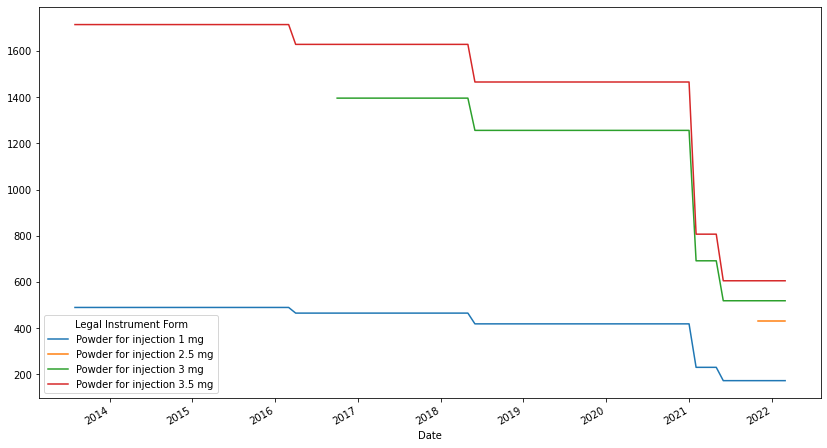

In [ ]:
res_plot = res.unstack()

res_plot.plot(figsize=(14, 8))

# Resources

Use Python on your local computer by installing [Anaconda](https://www.anaconda.com/products/individual).

If you don't have admin privileges, you can install a portable version of Python using [WinPython](https://winpython.github.io/).

Python 3.10 documentation: https://docs.python.org/3/

Pandas documentation: https://pandas.pydata.org/docs/

[StackOverflow](https://stackoverflow.com/): Amazing community of developers and coders. Pretty much every problem you will ever face has been answered in here somewhere before.

Quality of life libraries:

*   [pathlib for easy, readable filepath handling](https://docs.python.org/3/library/pathlib.html)
*   [urlpath for parsing URLs](https://github.com/brandonschabell/urlpath)
*   [tqdm progress bars](https://github.com/tqdm/tqdm)

YouTube channels

*   [Learn Python with Socratia](https://www.youtube.com/watch?v=bY6m6_IIN94&list=PLi01XoE8jYohWFPpC17Z-wWhPOSuh8Er-&ab_channel=Socratica)
*   [mCoding with James Murphy](https://www.youtube.com/c/mCodingWithJamesMurphy)
*   [FreeCodeCamp](https://www.youtube.com/c/Freecodecamp/playlists)

Challenges

*   [Advent of Code](https://adventofcode.com/) - 25 days of festive coding challenges each December 